In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_feat.xlsx')

In [3]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [4]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


In [5]:
df1=df1.drop_duplicates(ignore_index=True)

In [6]:
train=df1[0:300]
test=df1[300:]

In [7]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [8]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# applying KNN algoritham with K=1(worst case)
reg_model=KNeighborsRegressor()
reg_model.fit(X_train,y_train)

KNeighborsRegressor()

In [25]:
# Model score on test data set 
# regression metric is r2_score
reg_model.score(X_train,y_train)

0.6308435327551665

In [26]:
# Model performance score on test data set
reg_model.score(X_test,y_test)

0.5704254532502663

In [27]:
reg_model.score(X_,y_)

0.23894635767768535

 # Hyperparameter tuning

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# for hyper parameter (k) tuning we take k value in the range 1 to 100

accuracy = []


for i in range(1,50):
    
    reg_model = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='kd_tree')
    score=cross_val_score(reg_model,X,y,cv=10,)
    accuracy.append(score.mean())

Text(0, 0.5, 'Accuracy')

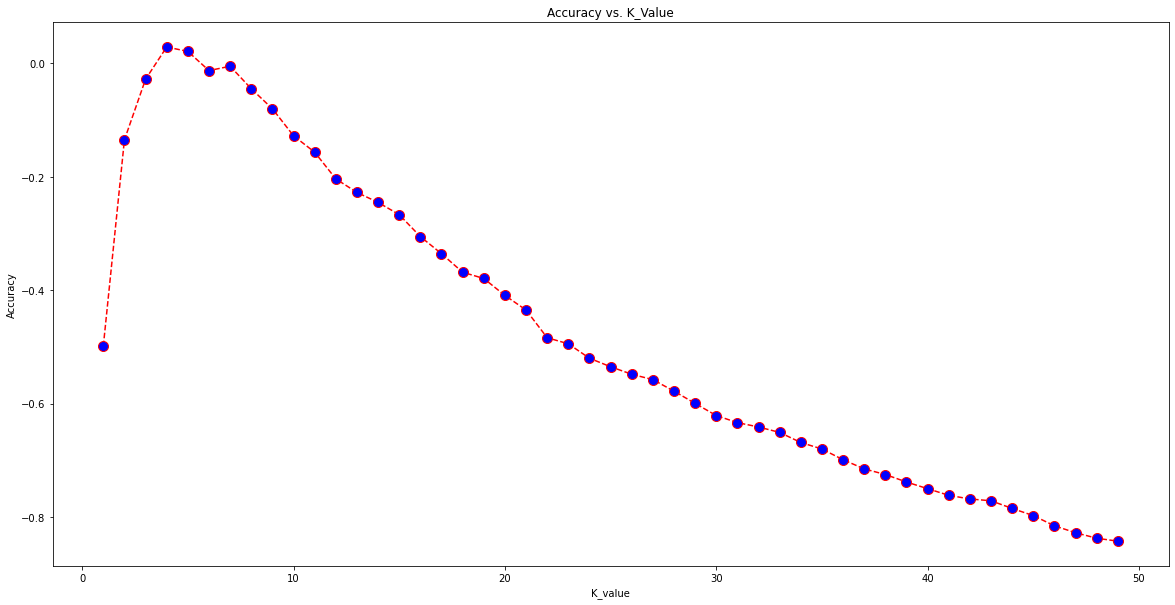

In [30]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),accuracy,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K_Value')
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [72]:
#Now we can apply KNN with k=17 to check performance

tuned_reg_model= KNeighborsRegressor(n_neighbors=6)

In [73]:
tuned_reg_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [74]:
# performance of model on train dataset
tuned_reg_model.score(X_train,y_train)

0.5877295226970689

In [75]:
# performance of model on test dataset
tuned_reg_model.score(X_test,y_test)

0.5465204522291446

In [76]:
tuned_reg_model.score(X_,y_)

0.2400197540193595

In [77]:
# prediction 

y_pred=tuned_reg_model.predict(X_)

In [78]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

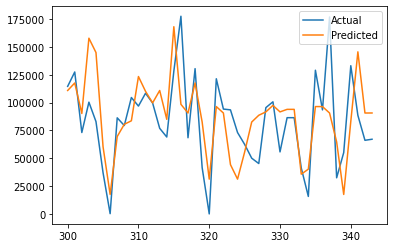

In [79]:
comp.plot()

In [80]:
comp['Error']=comp['Actual']-comp['Predicted']

In [81]:
comp

,Actual,Predicted,Error
300,114534.21,110813.795000,3720.415000
301,127412.10,117553.163333,9858.936667
302,73107.94,90201.230000,-17093.290000
303,100335.70,157712.511667,-57376.811667
304,82920.44,144853.936667,-61933.496667
305,36992.00,60297.073333,-23305.073333
306,326.00,17567.310000,-17241.310000
307,86287.17,69516.408333,16770.761667
308,79380.38,80499.018333,-1118.638333
309,104509.01,83630.176667,20878.833333


In [82]:
X_

,Completed Jobs,TMAX,Avg Sales,tech_count
300,111,63,1597.616912,39
301,131,72,1218.771111,61
302,108,74,1418.769895,50
303,118,64,1600.403596,70
304,116,65,1678.413214,37
305,53,72,1225.002424,17
306,1,84,326.000000,8
307,106,84,821.319479,51
308,102,75,1401.394130,49
309,50,70,2364.647059,23


In [83]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_,y_pred))

33702.62257596809